## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.178202  0.876062  0.894963  0.706117 -0.927406  0.672190
1  1.225906  0.223302  0.335897 -1.159631 -1.774401 -0.431284
2  0.525005  0.058856  1.751066  1.892219  0.642032  2.378419
3  0.708594 -0.558870  1.456475  0.918280  0.172794  1.034804
4 -0.840256 -1.531465  0.057358 -0.842292 -1.562479 -2.111182


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9714324	total: 57.9ms	remaining: 57.9s
1:	learn: 0.9603115	total: 58.5ms	remaining: 29.2s
2:	learn: 0.9501288	total: 59ms	remaining: 19.6s
3:	learn: 0.9396557	total: 59.5ms	remaining: 14.8s
4:	learn: 0.9300999	total: 60ms	remaining: 11.9s
5:	learn: 0.9207854	total: 60.6ms	remaining: 10s
6:	learn: 0.9096296	total: 61ms	remaining: 8.66s
7:	learn: 0.9004184	total: 61.5ms	remaining: 7.63s
8:	learn: 0.8905075	total: 62ms	remaining: 6.83s
9:	learn: 0.8825348	total: 62.6ms	remaining: 6.19s
10:	learn: 0.8743082	total: 63.1ms	remaining: 5.67s
11:	learn: 0.8640171	total: 63.6ms	remaining: 5.24s
12:	learn: 0.8553221	total: 64.8ms	remaining: 4.92s
13:	learn: 0.8450150	total: 65.3ms	remaining: 4.59s
14:	learn: 0.8373894	total: 65.8ms	remaining: 4.32s
15:	learn: 0.8286836	total: 66.2ms	remaining: 4.07s
16:	learn: 0.8203003	total: 66.7ms	remaining: 3.85s
17:	learn: 0.8110866	total: 67.1ms	remaining: 3.66s
18:	learn: 0.8027141	total: 67.7ms	remaining: 3.5s
19:

102:	learn: 0.3632172	total: 108ms	remaining: 937ms
103:	learn: 0.3602938	total: 108ms	remaining: 933ms
104:	learn: 0.3571966	total: 109ms	remaining: 927ms
105:	learn: 0.3538539	total: 109ms	remaining: 921ms
106:	learn: 0.3508171	total: 110ms	remaining: 915ms
107:	learn: 0.3475480	total: 110ms	remaining: 911ms
108:	learn: 0.3448726	total: 111ms	remaining: 906ms
109:	learn: 0.3417771	total: 111ms	remaining: 900ms
110:	learn: 0.3384923	total: 112ms	remaining: 894ms
111:	learn: 0.3355623	total: 112ms	remaining: 890ms
112:	learn: 0.3326280	total: 113ms	remaining: 886ms
113:	learn: 0.3296152	total: 113ms	remaining: 880ms
114:	learn: 0.3267610	total: 114ms	remaining: 875ms
115:	learn: 0.3238317	total: 114ms	remaining: 870ms
116:	learn: 0.3212245	total: 115ms	remaining: 865ms
117:	learn: 0.3190070	total: 115ms	remaining: 859ms
118:	learn: 0.3162015	total: 115ms	remaining: 854ms
119:	learn: 0.3136263	total: 116ms	remaining: 848ms
120:	learn: 0.3111199	total: 116ms	remaining: 843ms
121:	learn: 

269:	learn: 0.1023182	total: 186ms	remaining: 504ms
270:	learn: 0.1015813	total: 187ms	remaining: 503ms
271:	learn: 0.1008268	total: 187ms	remaining: 501ms
272:	learn: 0.1004161	total: 188ms	remaining: 500ms
273:	learn: 0.0999135	total: 188ms	remaining: 499ms
274:	learn: 0.0993108	total: 189ms	remaining: 498ms
275:	learn: 0.0988534	total: 189ms	remaining: 496ms
276:	learn: 0.0982132	total: 190ms	remaining: 495ms
277:	learn: 0.0978001	total: 190ms	remaining: 493ms
278:	learn: 0.0974700	total: 190ms	remaining: 492ms
279:	learn: 0.0970596	total: 191ms	remaining: 491ms
280:	learn: 0.0966749	total: 191ms	remaining: 489ms
281:	learn: 0.0963531	total: 192ms	remaining: 488ms
282:	learn: 0.0960764	total: 192ms	remaining: 487ms
283:	learn: 0.0958179	total: 192ms	remaining: 485ms
284:	learn: 0.0953860	total: 193ms	remaining: 484ms
285:	learn: 0.0947148	total: 193ms	remaining: 483ms
286:	learn: 0.0942754	total: 194ms	remaining: 482ms
287:	learn: 0.0940518	total: 194ms	remaining: 480ms
288:	learn: 

488:	learn: 0.0349740	total: 291ms	remaining: 304ms
489:	learn: 0.0348129	total: 291ms	remaining: 303ms
490:	learn: 0.0345841	total: 292ms	remaining: 303ms
491:	learn: 0.0344267	total: 293ms	remaining: 302ms
492:	learn: 0.0342783	total: 293ms	remaining: 301ms
493:	learn: 0.0341202	total: 293ms	remaining: 301ms
494:	learn: 0.0338994	total: 294ms	remaining: 300ms
495:	learn: 0.0337443	total: 294ms	remaining: 299ms
496:	learn: 0.0335989	total: 295ms	remaining: 298ms
497:	learn: 0.0334692	total: 295ms	remaining: 298ms
498:	learn: 0.0333222	total: 296ms	remaining: 297ms
499:	learn: 0.0331802	total: 296ms	remaining: 296ms
500:	learn: 0.0330388	total: 296ms	remaining: 295ms
501:	learn: 0.0328655	total: 297ms	remaining: 295ms
502:	learn: 0.0327456	total: 297ms	remaining: 294ms
503:	learn: 0.0325986	total: 298ms	remaining: 293ms
504:	learn: 0.0324088	total: 298ms	remaining: 292ms
505:	learn: 0.0322240	total: 299ms	remaining: 292ms
506:	learn: 0.0320888	total: 299ms	remaining: 291ms
507:	learn: 

652:	learn: 0.0186981	total: 369ms	remaining: 196ms
653:	learn: 0.0186402	total: 370ms	remaining: 196ms
654:	learn: 0.0185596	total: 370ms	remaining: 195ms
655:	learn: 0.0184726	total: 371ms	remaining: 195ms
656:	learn: 0.0184593	total: 372ms	remaining: 194ms
657:	learn: 0.0184045	total: 372ms	remaining: 193ms
658:	learn: 0.0183155	total: 373ms	remaining: 193ms
659:	learn: 0.0182626	total: 373ms	remaining: 192ms
660:	learn: 0.0181843	total: 374ms	remaining: 192ms
661:	learn: 0.0181077	total: 374ms	remaining: 191ms
662:	learn: 0.0180339	total: 374ms	remaining: 190ms
663:	learn: 0.0179464	total: 375ms	remaining: 190ms
664:	learn: 0.0179278	total: 375ms	remaining: 189ms
665:	learn: 0.0178528	total: 376ms	remaining: 188ms
666:	learn: 0.0177794	total: 376ms	remaining: 188ms
667:	learn: 0.0176924	total: 377ms	remaining: 187ms
668:	learn: 0.0176213	total: 377ms	remaining: 187ms
669:	learn: 0.0176087	total: 378ms	remaining: 186ms
670:	learn: 0.0175908	total: 378ms	remaining: 185ms
671:	learn: 

869:	learn: 0.0083909	total: 474ms	remaining: 70.8ms
870:	learn: 0.0083859	total: 474ms	remaining: 70.2ms
871:	learn: 0.0083667	total: 475ms	remaining: 69.7ms
872:	learn: 0.0083617	total: 475ms	remaining: 69.1ms
873:	learn: 0.0083231	total: 476ms	remaining: 68.6ms
874:	learn: 0.0082830	total: 476ms	remaining: 68ms
875:	learn: 0.0082773	total: 477ms	remaining: 67.5ms
876:	learn: 0.0082357	total: 477ms	remaining: 66.9ms
877:	learn: 0.0082309	total: 477ms	remaining: 66.3ms
878:	learn: 0.0082120	total: 478ms	remaining: 65.8ms
879:	learn: 0.0082072	total: 478ms	remaining: 65.2ms
880:	learn: 0.0081886	total: 479ms	remaining: 64.6ms
881:	learn: 0.0081839	total: 479ms	remaining: 64.1ms
882:	learn: 0.0081346	total: 479ms	remaining: 63.5ms
883:	learn: 0.0081089	total: 480ms	remaining: 63ms
884:	learn: 0.0080613	total: 480ms	remaining: 62.4ms
885:	learn: 0.0080567	total: 481ms	remaining: 61.9ms
886:	learn: 0.0080384	total: 482ms	remaining: 61.4ms
887:	learn: 0.0080086	total: 482ms	remaining: 60.8

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

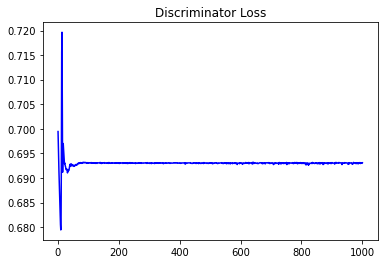

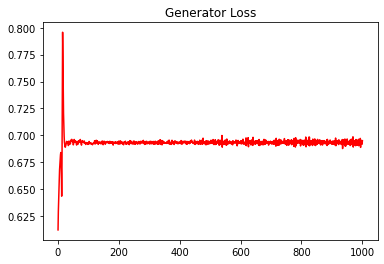

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.19644910857968306


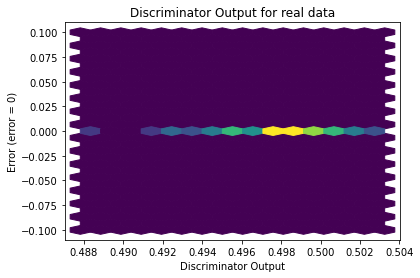

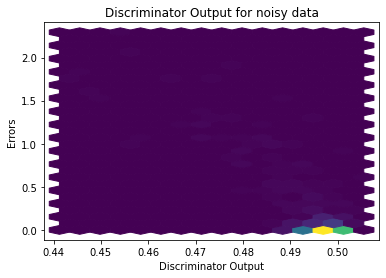

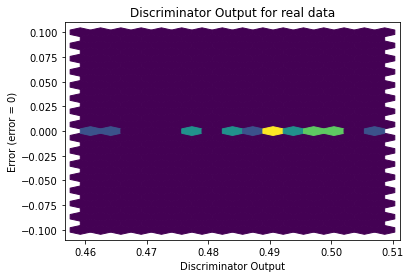

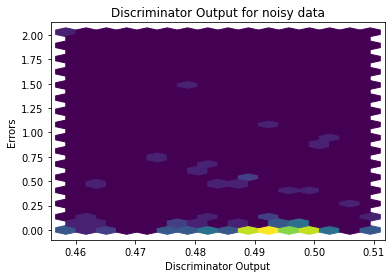

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


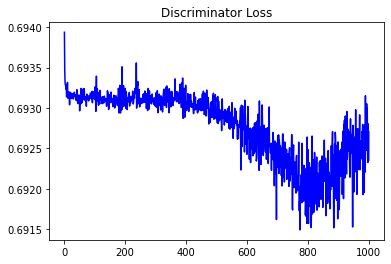

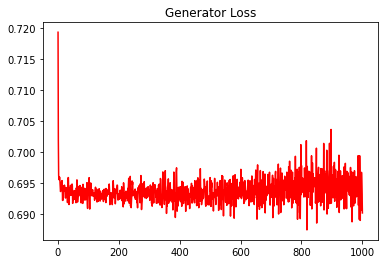

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1357658456371339


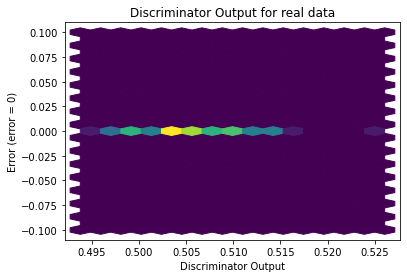

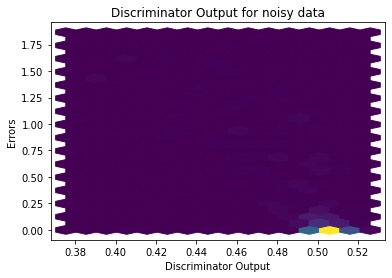

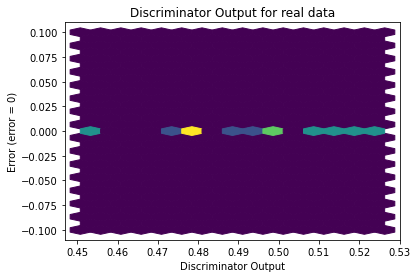

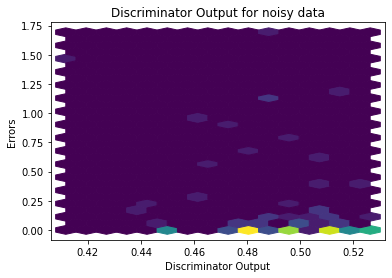

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1168]], requires_grad=True)
